In [1]:
from sympy import init_printing

init_printing()

# Symbolic Mathematics using SymPy

## Hayao Suzuki

- PyCon JP 2018 at Ota City Industrial Plaza
- September 17, 2018

# We will talk about...

- Why SymPy?
- How to use SymPy
- Mathematics (Undergraduate Level)

# We DON'T talk about...

- SymPy Internal (implementions, etc...)
- Algorithms of calculation
- Mathematics (High School Level)

# Are You Ready?

$$e^{x} = \sum^{\infty}_{k=0}\frac{x^{k}}{k!}$$

$$ \int^{\infty}_{-\infty} \frac{x}{\sqrt{2\pi \sigma^{2}}} \exp \left (-\frac{(x-\mu)^{2}}{2\sigma^{2}} \right )dx = \mu$$

# About Me

- Name: Hayao Suzuki (@CardinalXaro)
- Blog: https://xaro.hatenablog.jp/
- Major: Mathematics (Combinatorics, Number Theory)
- Work: Python Programmer at [iRidge, Inc.](https://iridge.jp/)

# Reviewed Books (Excerpted)

- Effective Python (O’Reilly Japan)
- アルゴリズム クイックリファレンス 第 2 版 (O’Reilly Japan)
- すらすらわかる Python （翔泳社）
- Head First Python 第 2 版 (O’Reilly Japan)
- Python データサイエンスハンドブック (O’Reilly Japan)
- Python によるデータ分析入門 第 2 版 (O’Reilly Japan)

# What’s SymPy?

- A Python library for symbolic mathematics
- Open source software(BSD license)
- Written in pure Python
- Dependency on mpmath library only


# What’s mpmath?

- Real and complex floating point arithmetic with arbitrary precision

# Symbolic vs Numeric

## Solve this equation:

$$x^2 -8 = 0$$

### Symbolic

$$x = \pm 2\sqrt{2}$$

### Numeric

$$x = \pm 2.82842712474619$$

# Open Source vs Proprietary

## Open Source Software
- Maxima (Lisp)
- SymPy
- SageMath (Including SymPy, Python 2 only)

## Proprietary Software
- Mathematica
- Maple
- Magma


## My History

I used Mathematica when I was undergraduate, but I lost my student license when I became a graduate student.

# How to Install and Use SymPy

## How to Install Sympy

- `$ pip install sympy` (from PyPI)
- `$ conda update sympy` (from Anaconda)
- See http://docs.sympy.org/latest/install.html for more detail


## How to Use Sympy 

- `import sympy`
- `$ isympy`
- Jupyter Notebook (I recommend)


## I don’t want to install SymPy, but want to use it...

- OK, let’s go to http://live.sympy.org/

# Basics

# Symbols

$$e^{x} = \sum^{\infty}_{k=0}\frac{x^{k}}{k!}$$

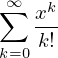

In [2]:
from sympy import Sum, Symbol, factorial, oo

x = Symbol("x")
k = Symbol("k", integer=True)

s = Sum(x**k / factorial(k), (k, 0, oo))
s

In [3]:
s.doit()

# Symbols with Property

$$ \int^{\infty}_{-\infty} \frac{x}{\sqrt{2\pi \sigma^{2}}} \exp \left (-\frac{(x-\mu)^{2}}{2\sigma^{2}} \right )dx = \mu$$

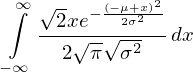

In [4]:
from sympy import Integral, Symbol, exp, oo, pi, sqrt

x = Symbol("x")
mu = Symbol("mu")
sigma = Symbol("sigma")
f = (x / sqrt(2 * pi * sigma**2)) *  exp(-((x - mu)**2) / (2 * sigma**2))
expr = Integral(f, (x, -oo, oo))
expr

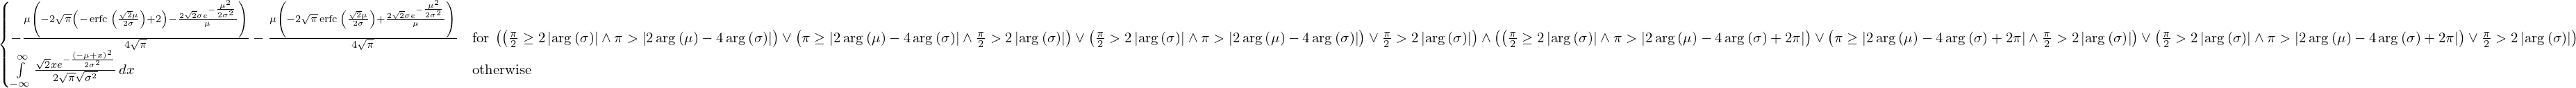

In [5]:
expr.doit()  # What's happen?

In [6]:
x = Symbol("x")
mu = Symbol("mu", real=True)  # mu should be Real 
sigma = Symbol("sigma", real=True, positive=True) # sigma should be Real and Positive value
f = (x / sqrt(2 * pi * sigma**2)) *  exp(-((x - mu)**2) / (2 * sigma**2))
expr = Integral(f, (x, -oo, oo))
expr.doit()  # OK, I expected.

# Expand and Factor

$$ (a + 2b + 3c)^{3} $$

In [7]:
from sympy import Symbol, symbols

a = Symbol("a")
b, c = symbols("b, c")

expr = (a + 2 * b + 3 * c) **3
expr

In [8]:
expanded =  expr.expand()
expanded

In [9]:
expanded.factor()

# Solvers

$$ax^{2} + bx + c = 0$$

In [10]:
from sympy import Eq, simplify, solveset, symbols

x, a, b, c= symbols("x, a, b, c")
eq = Eq(a * x**2 + b * x + c, 0)
eq

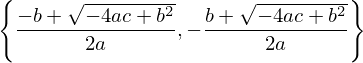

In [11]:
simplify(solveset(eq, x))

# Solver with Domains

$$x^{3} - 1 = 0$$

In [12]:
from sympy import Eq, S, Symbol, simplify, solveset

x = Symbol("x")
eq = Eq(x**3 -1, 0)
eq

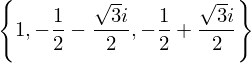

In [13]:
simplify(solveset(eq, x))  # Complex Fields

In [14]:
solveset(eq, x, domain=S.Reals)  # Real Fields

# Satisfiability Problem

$$(x \vee x \vee y) \wedge (\neg x \vee \neg y \vee \neg y) \wedge (\neg x \vee y \vee y)$$

In [15]:
from sympy import satisfiable, symbols

x, y = symbols("x, y")
expr = (x | x | y) & (~x | ~y | ~y) & (~x | y | y)
expr

In [16]:
satisfiable(expr)

{y: True, x: False}

# Calculus

# Limits

$$\displaystyle \lim_{x \to 0} \frac{\sin{x}}{x}$$

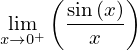

In [17]:
from sympy import Limit, Symbol, sin

x = Symbol("x")
f = (sin(x) / x)
expr = Limit(f, x, 0, "+")
expr

In [18]:
expr.doit()

In [19]:
Limit(f, x, 0, "-").doit()

# Derivative

$$ \frac{d}{dx} e^{x}\sin{x} $$

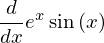

In [20]:
from sympy import Symbol, Derivative, exp, sin

x = Symbol("x")
f = exp(x) * sin(x)
expr = Derivative(f, x)
expr

In [21]:
expr.doit()

# Quotient Rule of Derivatives

$$ \frac{d}{dx} \frac{f(x)}{g(x)}$$

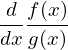

In [22]:
from sympy import Derivative, Function, Symbol, simplify

x = Symbol("x")
f = Function("f")(x)
g = Function("g")(x)

expr = Derivative(f / g, x)
expr

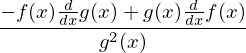

In [23]:
simplify(expr.doit())

# Taylor series

$$ f(x) = \sum^{n}_{k=0} \frac{f^{(k)}(a)}{k!} (x-a)^{k} + h_{k}(x)(x-a)^{k}, \text{where} \lim_{x \to a}h_{k}(x) = 0$$

In [24]:
from sympy import Symbol, exp, series, pi, sin

x = Symbol("x")
f = exp(x) + sin(x)
f

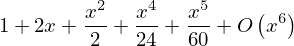

In [25]:
f.series() # Taylor Series at a = 0

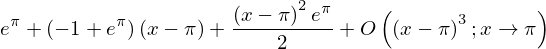

In [26]:
f.series(x0=pi, n=3) # Taylor Series at a = pi

# Partial Derivative

$$\frac{\partial^{7}}{\partial z^{4}\partial y^{2}\partial x} e^{x y z}$$

In [1]:
from sympy import Derivative, symbols, exp

x, y, z = symbols("x, y, z")
f = exp(x*y*z)
expr = Derivative(f, x, y, y, z, z, z, z)
expr

Derivative(exp(x*y*z), x, (y, 2), (z, 4))

In [28]:
expr.doit()

# Integral

$$ \int^{\pi}_{0} xe^{-x^{2}}dx$$

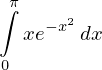

In [29]:
from sympy import Integral, Symbol, exp, pi

x = Symbol("x")
f = x * exp(-x**2)
expr = Integral(f, (x, 0, pi))
expr

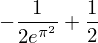

In [30]:
expr.doit()

# Integral (Difficult for Me)

$$ \int^{\infty}_{-\infty}\frac{\cos{x}}{x^{2} + 1}dx$$

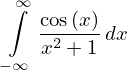

In [31]:
from sympy import Integral, Symbol, cos, oo, simplify

x = Symbol("x")
f = cos(x) / (1 + x**2)
expr = Integral(f, (x, -oo, oo))
expr

In [32]:
expr.doit()

In [33]:
simplify(expr.doit())

# Multiple Integral

$$ \int^{\infty}_{-\infty} \int^{\infty}_{-\infty} e^{-x^{2}-y^{2}}dxdy$$

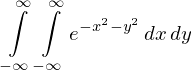

In [34]:
from sympy import Integral, exp, oo, symbols

x, y = symbols("x, y")
f = exp(-x**2 -y**2)
expr = Integral(f, (x, -oo, oo), (y, -oo, oo))
expr

In [35]:
expr.doit()

# Differential Equation of Simple Harmonic Motion

$$ \frac{d^{2}}{dt^{2}} f(t) + \frac{k}{m}f(t) = 0$$

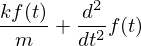

In [36]:
from sympy import Derivative, Function, Symbol, classify_ode, dsolve,  symbols, trigsimp

t = Symbol("t")
k, m = symbols("k, m", positive=True)  # k and m should be positive constant
f = Function("f")(t)
expr = Derivative(f, t, 2) + (k / m) * f
expr

In [37]:
classify_ode(expr)

('nth_linear_constant_coeff_homogeneous',)

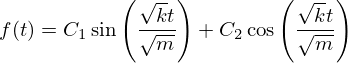

In [38]:
dsolve(expr, hint='nth_linear_constant_coeff_homogeneous')

# Bernoulli Differential Equation

$$ \frac{dy}{dx} + f(x)y = g(x)y^{n}$$

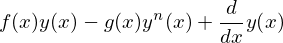

In [39]:
from sympy import Derivative, Function, Symbol, dsolve,  symbols

x = Symbol("x")
y = Function("y")(x)
f = Function("f")(x)
g = Function("g")(x)
n = Symbol("n", nonnegative=True)

expr = Derivative(y, x) + f * y - g * y**n
expr

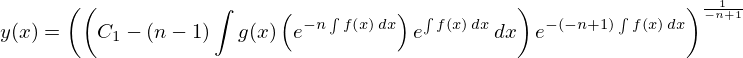

In [40]:
dsolve(expr, func=y, hint='Bernoulli')

# Linear Algebra

# Calculation of Martices and Vectors

# Vandermonde's Determinant

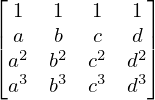

In [41]:
from sympy import Matrix, factor, symbols

a, b, c, d = symbols("a, b, c, d")
A = Matrix([
    [1, 1, 1, 1], 
    [a, b, c, d], 
    [a**2, b**2, c**2, d**2],
    [a**3, b**3, c**3, d**3],
])
A

In [42]:
factor(A.det())

# Rank

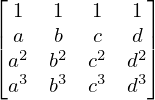

In [43]:
from sympy import Matrix, factor, symbols

a, b, c, d = symbols("a, b, c, d")
A = Matrix([
    [1, 1, 1, 1], 
    [a, b, c, d], 
    [a**2, b**2, c**2, d**2],
    [a**3, b**3, c**3, d**3],
])
A

In [44]:
A.rank()

# Inverse Matrix

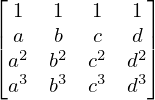

In [45]:
from sympy import Matrix, factor, symbols

a, b, c, d = symbols("a, b, c, d")
A = Matrix([
    [1, 1, 1, 1], 
    [a, b, c, d], 
    [a**2, b**2, c**2, d**2],
    [a**3, b**3, c**3, d**3],
])
A

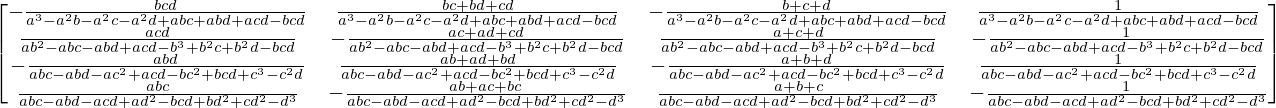

In [46]:
from sympy import simplify

simplify(A.inv())

# Image and Kernel of Linear Mapping

# Cayley-Hamilton Theorem

$$ f_{A}(A) = 0 $$

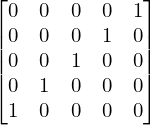

In [47]:
from sympy import Symbol, Matrix, factor, eye, zeros

lamda = Symbol('lamda')

A = Matrix([
    [0, 0, 0, 0, 1], 
    [0, 0, 0, 1, 0], 
    [0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0],
])
A

In [48]:
p = A.charpoly(lamda)
factor(p)  # Characteristics Polynomial of A

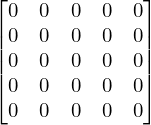

In [49]:
E = eye(5)
(A - E)**3 * (A + E)**2

# Jordan Normal Form

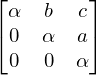

In [50]:
from sympy import Matrix, jordan_cell, symbols

alpha, a, b, c = symbols("alpha, a, b, c")
A = Matrix([
    [alpha, b, c],
    [0, alpha, a],
    [0, 0, alpha],
])
A

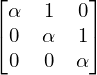

In [51]:
P, J = A.jordan_form()  # A = P * J * P**-1
J

# Quadtatic Form

$$(x_{1} + x_{2})^{2} + x_{3}x_{4} \to y^{2}_{1} + y^{2}_{2} - y^{2}_{4}$$

In [52]:
from sympy import Matrix, Rational, symbols

x1, x2, x3, x4 = symbols("x1, x2, x3, x4")

A = Matrix([
    [1, 1, 0, 0],
    [1, 1, 0, 0],
    [0, 0, 0, Rational(1, 2)],
    [0, 0, Rational(1, 2), 0],
])
x = Matrix([x1, x2, x3, x4])
x.T * A * x  # Quadtatic Form

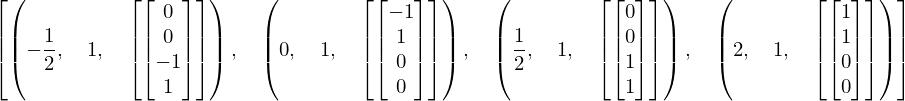

In [53]:
A.eigenvects()

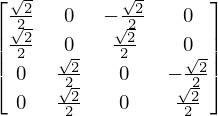

In [54]:
from functools import reduce
from sympy import GramSchmidt

v1 = Matrix([1, 1, 0, 0])
v2 = Matrix([0, 0, 1, 1])
v3 = Matrix([-1, 1, 0, 0])
v4 = Matrix([0, 0, -1, 1])

normalized_bases = GramSchmidt([v1, v2, v3, v4], orthonormal=True)

T = reduce(lambda x, y:x.row_join(y), normalized_bases)  # make matrix from column vectors
T  # T should be orthogonal matrix

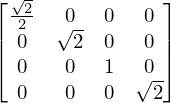

In [55]:
from sympy import sqrt, diag

D = diag(1 / sqrt(2), 1 / sqrt(Rational(1, 2)), 1, 1 / sqrt(Rational(1, 2)))
D

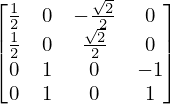

In [56]:
P = T * D
P

In [57]:
from sympy import simplify

y1, y2, y3, y4 = symbols("y1, y2, y3, y4")
y = Matrix([y1, y2, y3, y4])

simplify((P * y).T * A * (P * y))

# Functions of Martices

$$ \exp(A) = \sum^{\infty}_{k=0}\frac{A^{k}}{k!}$$

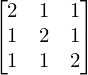

In [58]:
from sympy import Matrix, exp

A = Matrix([
    [2, 1, 1],
    [1, 2, 1],
    [1, 1, 2]
])
A

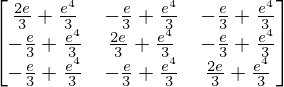

In [59]:
exp(A)

# Number Theory

# Prime Number Theorem

$$ \lim_{x \to \infty} \displaystyle \frac{\pi(x)}{\displaystyle \frac{x}{\log{x}}} = 1$$

In [60]:
from sympy import N, log, primepi

x = 10**10
N(primepi(x) / (x / log(x)))

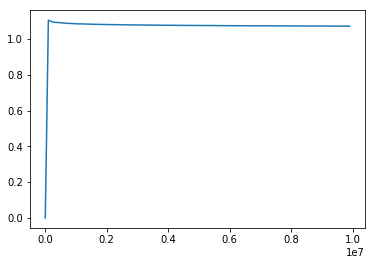

In [61]:
%matplotlib inline

import matplotlib.pyplot as plt

MAX_SIZE = 10**7
STEP = MAX_SIZE // 10**2

plt.plot(range(1, MAX_SIZE, STEP), [N(primepi(x) / (x / log(x))) for x in range(1, MAX_SIZE, STEP)])

# Bertrand–Chebyshev Theorem

Let $\{p_{n}\} _{n\ge1}$ be a sequence of prime numbers, then $p_{n+1} < 2p_{n}$.

In 1845, Joseph Bertrand himself verified his statement for $2$ to $3 \times 10^{6}$. In 2018, Hayao Suzuki verified this statement for $2$ to $3 \times 10^{6}$ by Shift-Enter!

In [62]:
from itertools import tee
from sympy import sieve

def pairwise(iterable):
    """s -> (s0,s1), (s1,s2), (s2, s3), ..."""
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)


all([p < q < 2 * p for p, q in pairwise(sieve.primerange(1, 3 * (10**6)))])  

True

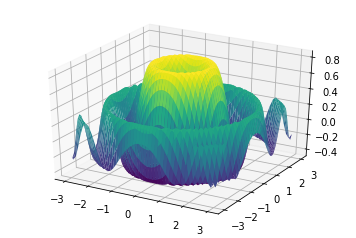

In [75]:
from sympy import plot, diff, plot, sin, sqrt
from sympy.plotting import plot3d

x = Symbol("x")
y = Symbol("y")

f = sin(x**2 + y**2) / sqrt((x**2 + y**2))
plot3d(f, (x, -3, 3), (y, -3, 3))

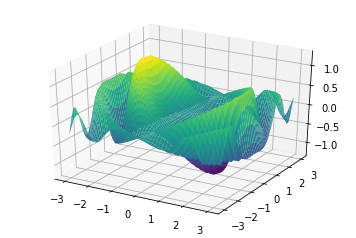

In [71]:
plot3d(f.diff(x), (x, -3, 3), (y, -3, 3))

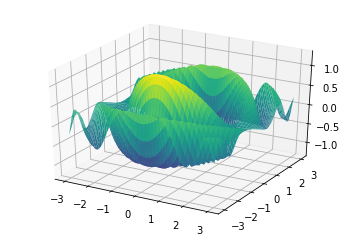

In [72]:
plot3d(f.diff(y), (x, -3, 3), (y, -3, 3))

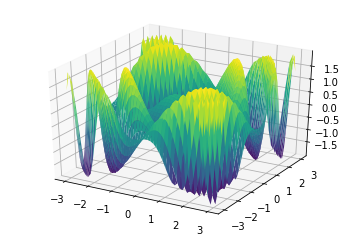

In [73]:
plot3d(f.diff(x, y), (x, -3, 3), (y, -3, 3))

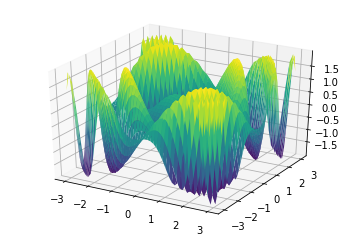

In [74]:
plot3d(f.diff(y, x), (x, -3, 3), (y, -3, 3))

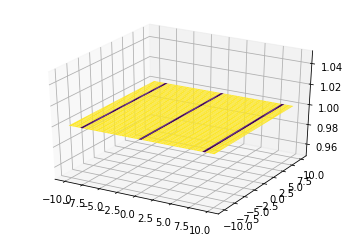

In [88]:
z = Symbol("z", complex=True)

f = sin(z)**2 + cos(z)**2
plot3d(f)